In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
mnist = fetch_openml('mnist_784', as_frame = False)

In [3]:
X, y = mnist.data, mnist.target

'5'

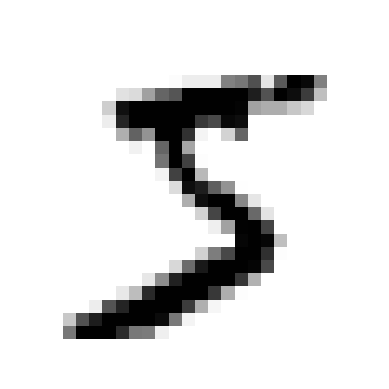

In [4]:
import time
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
some_digit = X[0]
plot_digit(some_digit)
y[0]
    


In [5]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [6]:
y_train_5 = (y_train =="5")
y_test_5 = (y_test == "5")

In [7]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [8]:
sgd_clf.predict([some_digit]) 

array([ True])

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [10]:
# from sklearn.dummy import DummyClassifier
# dummy_clf = DummyClassifier()
# dummy_clf.fit(X_train, y_train_5)
# print(any(dummy_clf.predict(X_train)))

In [11]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train,y_train_5, cv=3)

In [12]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [13]:
# cc = pd.Series(data=y_train_pred, name = "classes")
# cc.unique()

In [15]:
from sklearn.metrics import confusion_matrix,precision_score, recall_score
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [22]:
print(precision_score(y_train_5, y_train_pred))
recall_score(y_train_5, y_train_pred)

0.8370879772350012


0.6511713705958311

In [25]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5, cv=3,method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [34]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

(60001,)

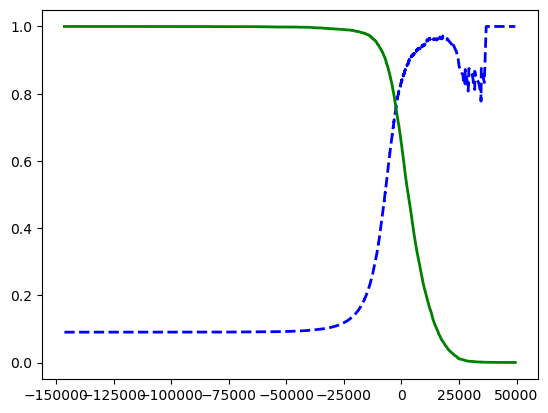

In [48]:
# threshold = 3370.0194991439594
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
# plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.show()

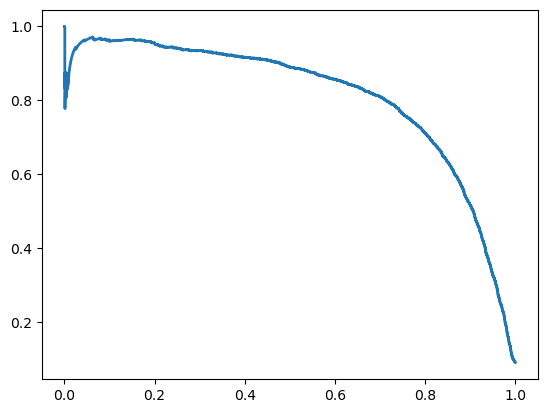

In [41]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

In [43]:
idx_for_90_precision = (precisions >= 0.90).argmax() #finds the maximum precision
idx_for_90_precision

57109

In [46]:
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439594

In [62]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)
print(precision_score(y_train_5,y_train_pred_90))
recall_score(y_train_5, y_train_pred_90)

0.9000345901072293


0.4799852425751706